# Combining Data With Pandas

In the last mission, we worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources. In this mission, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.

We'll use what we learned in the last mission to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:

Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically

Below are descriptions for some of the columns:

- **Country** - Name of the country
- **Region** - Name of the region the country belongs to
- **Happiness Rank** - The rank of the country, as determined by its happiness score
- **Happiness Score** - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Introduction

Let's start by reading the **2015**, **2016**, and **2017** reports into a pandas dataframe and adding a **Year** column to each to make it easier to distinguish between them.

**Instructions**  
We've already read the World_Happiness_2015.csv file into a dataframe called happiness2015.

- Use the **pandas.read_csv()** function to read the **World_Happiness_2016.csv** file into a dataframe called **happiness2016** and the **World_Happiness_2017.csv** file into a dataframe called **happiness2017**.
- Add a column called **Year** to each dataframe with the corresponding year. For example, the **Year** column in **happiness2015** should contain the value **2015** for each row.

In [2]:
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2016 = pd.read_csv('World_Happiness_2016.csv')
happiness2017 = pd.read_csv('World_Happiness_2017.csv')

In [3]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### 2. Combining Dataframes with the Concat Function

Let's start by exploring the pd.concat() function. The concat() function combines dataframes one of two ways:  
   
   1. **Stacked**: Axis = 0 (This is the default option.)  
   2. **Side by Side**: Axis = 1  

Since `concat` is a function, not a method, we use the syntax below:

![Concat function](./Concat_syntax.svg)

In [4]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

Let's use the **concat()** function to combine **head_2015** and **head_2016** next.


**Instructions**

We've already saved the subsets from  `happiness2015`  and  `happiness2016`  to the variables  `head_2015`  and  `head_2016`.

-   Use the  `pd.concat()`  function to combine  `head_2015`  and  `head_2016`  along axis = 0. Remember to pass the  `head_2015`  and  `head_2016`  into the function as a list. Assign the result to  `concat_axis0`.
-   Use the  `pd.concat()`  function to combine  `head_2015`  and  `head_2016`  along axis = 1. Remember to pass  `head_2015`  and  `head_2016`  into the function as a list and set the  `axis`  parameter equal to  `1`. Assign the result to  `concat_axis1`.
-   Use the variable inspector to view  `concat_axis0`  and  `concat_axis1`.
    -   Assign the number of rows in  `concat_axis0`  to a variable called  `question1`.
    -   Assign the number of rows in  `concat_axis1`  to a variable called  `question2`.


In [5]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [6]:
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


In [7]:
question1 = 6
question2 = 3

### 3. Combining Dataframes with the Concat Function Continued 

In [8]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [9]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


Notice in the subsets above that `head_2015` contains one column that `head_2016` does not - the `Standard Error` column. Let's confirm what happens when we concatenate them next.

**Instructions**

We've already created the  `head_2015`  and  `head_2016`  variables.

-   Use the  `pd.concat()`  function to combine  `head_2015`  and  `head_2016`  along axis = 0. Remember to pass the  `head_2015`  and  `head_2016`  into the function as a list. Assign the result to  `concat_axis0`.
-   Use the variable inspector to view  `concat_axis0`.
    -   Assign the number of rows in  `concat_axis0`  to a variable called  `rows`.
    -   Assign the number of columns in  `concat_axis0`  to a variable called  `columns`.


In [10]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [11]:
rows = 7
columns = 4

### 4. Combining Dataframes with Different Shapes Using the Concat Function

**Instructions**  
-   Use the  `pd.concat()`  function to combine  `head_2015`  and  `head_2016`  along axis = 0 again. This time, however, set the  `ignore_index`  parameter to  `True`  to reset the index in the result. Assign the result to  `concat_update_index`.
    -   Use the variable inspector to view the results and confirm the index was reset.


In [12]:
concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


### 5. Joining Dataframes with the Merge Function


We'll explore the `merge` function in the next exercise using just three rows from `happiness2015` and `happiness2016`:


In [13]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2015


,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [14]:
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


We'll use the following syntax:
![Merge functino syntax](./Merge_syntax.svg)

**Instructions**  
We've already saved three rows from  `happiness2015`  and  `happiness2016`  to variables named  `three_2015`  and  `three_2016`.

-   Use the  `pd.merge()`  function to join  `three_2015`  and  `three_2016`  on the  `Country`  column. Assign the result to  `merged`


In [15]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


### 4. Combining Dataframes with Different Shapes Using the Concat Function

**Instructions**
-   Use the  `pd.concat()`  function to combine  `head_2015`  and  `head_2016`  along axis = 0 again. This time, however, set the  `ignore_index`  parameter to  `True`  to reset the index in the result. Assign the result to  `concat_update_index`.
    -   Use the variable inspector to view the results and confirm the index was reset.


In [16]:
concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


### 6. Joining on Columns with the Merge Function

**Instructions**

-   Update  `merged`  to use a left join instead of an inner join. Set the  `how`  parameter to  `'left'`  in  `merge()`. Assign the result to  `merged_left`.
-   Update  `merged_left`  so that the  `left`  parameter equals  `three_2016`  and the  `right`  parameter equals  `three_2015`. Assign the result to  `merged_left_updated`.
-   Based on the results of this exercise, when using a left join, does changing the dataframe assigned to the  `left`  and  `right`  parameters change the result? Try to answer this question before moving onto the next screen.


In [17]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left') 

In [18]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [19]:
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [20]:
merged_left_updated

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


### 7. Left Joins with the Merge Function

**Instructions**
-   Update  `merged`  to use the suffixes  `_2015`  and  `_2016`. Set the  `suffixes`  parameter to  `('_2015', '_2016')`  in  __[`merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)__. Assign the result to  `merged_suffixes`.
-   Update  `merged_updated`  to use the suffixes  `_2015`  and  `_2016`. Notice that the "left" dataframe is  `three_2016`  and the "right" dataframe is  `three_2015`. Assign the result to  `merged_updated_suffixes`.


In [21]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, on='Country', how='left', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, on='Country', how='left', suffixes=('_2016', '_2015'))

In [22]:
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [23]:
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


### 8. Join on Index with the Merge Function

To join on the index, we'll set the `left_index` and `right_index` parameters to `True`: 

``pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))``  

In [24]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

In [25]:
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [26]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [27]:
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


**Instructions**

We've already saved  `four_2015`  and  `three_2016`. In this exercise, we'll use a left join to combine  `four_2015`  and  `three_2016`.

-   Predict the number of rows and columns the resulting dataframe will have. Assign the number of rows to a variable called  `rows`  and the number of columns to a variable called  `columns`.
-   To change the join type used in  `merge_index`  to a left join, set the  `how`  parameter equal to  `'left'`. Save the result to  `merge_index_left`.
-   Update  `rows`  and  `columns`  so that each contains the correct number of rows and columns in  `merge_index_left`.


In [28]:
our_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
rows = 3
columns = 6

In [29]:
merge_index_left = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, how='left', suffixes=('_2015', '_2016'))
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


In [30]:
rows = 4
columns = 6

### 9. Challenge: Combine Data and Create a Visualization

**Did world happiness increase, decrease, or stay about the same from 2015 to 2017?**

To answer this question, we'll create a bar plot in which each bar represented the mean happiness score for one of the years. We completed a similar task in the last mission when we calculated the mean happiness score for each region using the  `df.pivot_table()`  method:


In [31]:
means = happiness2015.pivot_table(index='Region', values='Happiness Score', aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


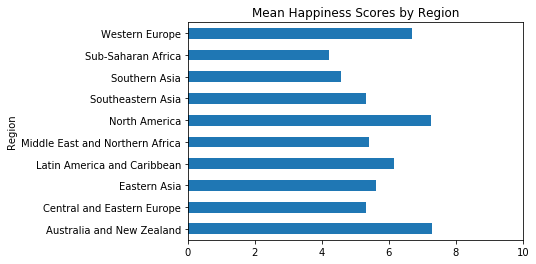

In [32]:
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0, 10), legend=False)


Let's repeat the same steps, but this time, we'll group the data by the  `Year`  column. First, let's rename the  `Happiness.Score`  column so it matches the column name in  `happiness2015`  and  `happiness2016`:

``happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)``

Next, we need to combine  `happiness2015`,  `happiness2016`, and  `happiness2017`, so that we can group the result by the  `Year`  column.

Let's use what we learned in this mission to combine the dataframes.


In [33]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

**Instructions**

We've already created a  `Year`  column in  `happiness2017`  and renamed the  `Happiness.Score`  column to  `Happiness Score`.

-   Use either the  `pd.concat()`  function or the  `pd.merge()`  function to combine  `happiness2015`,  `happiness2016`, and  `happiness2017`. Assign the result to  `combined`.
    -   Think about whether you need to combine the data horizontally or vertically in order to create a dataframe that can be grouped by year, and decide which function (`pd.concat()`  or  `pd.merge()`) you can use to combine the data.
-   Use the  `df.pivot_table()`  method to create a pivot table from the  `combined`  dataframe. Set  `Year`  as the index and  `Happiness Score`  as the values. Assign the result to  `pivot_table_combined`.
-   Use the  `df.plot()`  method to create a bar chart of the results. Set the  `kind`  parameter to  `barh`, the title to  `'Mean Happiness Scores by Year'`, and the  `xlim`  parameter to  `(0,10)`.
-   Try to answer the following question based on the results of this exercise: Did world happiness increase, decrease, or stay about the same from 2015 to 2017?


In [34]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0)
combined

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,...,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,...,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,...,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,...,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


In [35]:
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score')
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


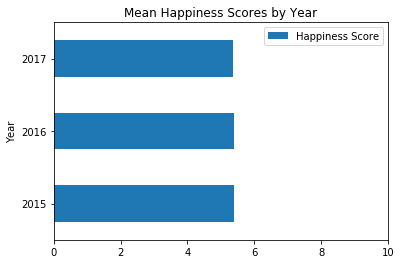

In [36]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0 ,10))